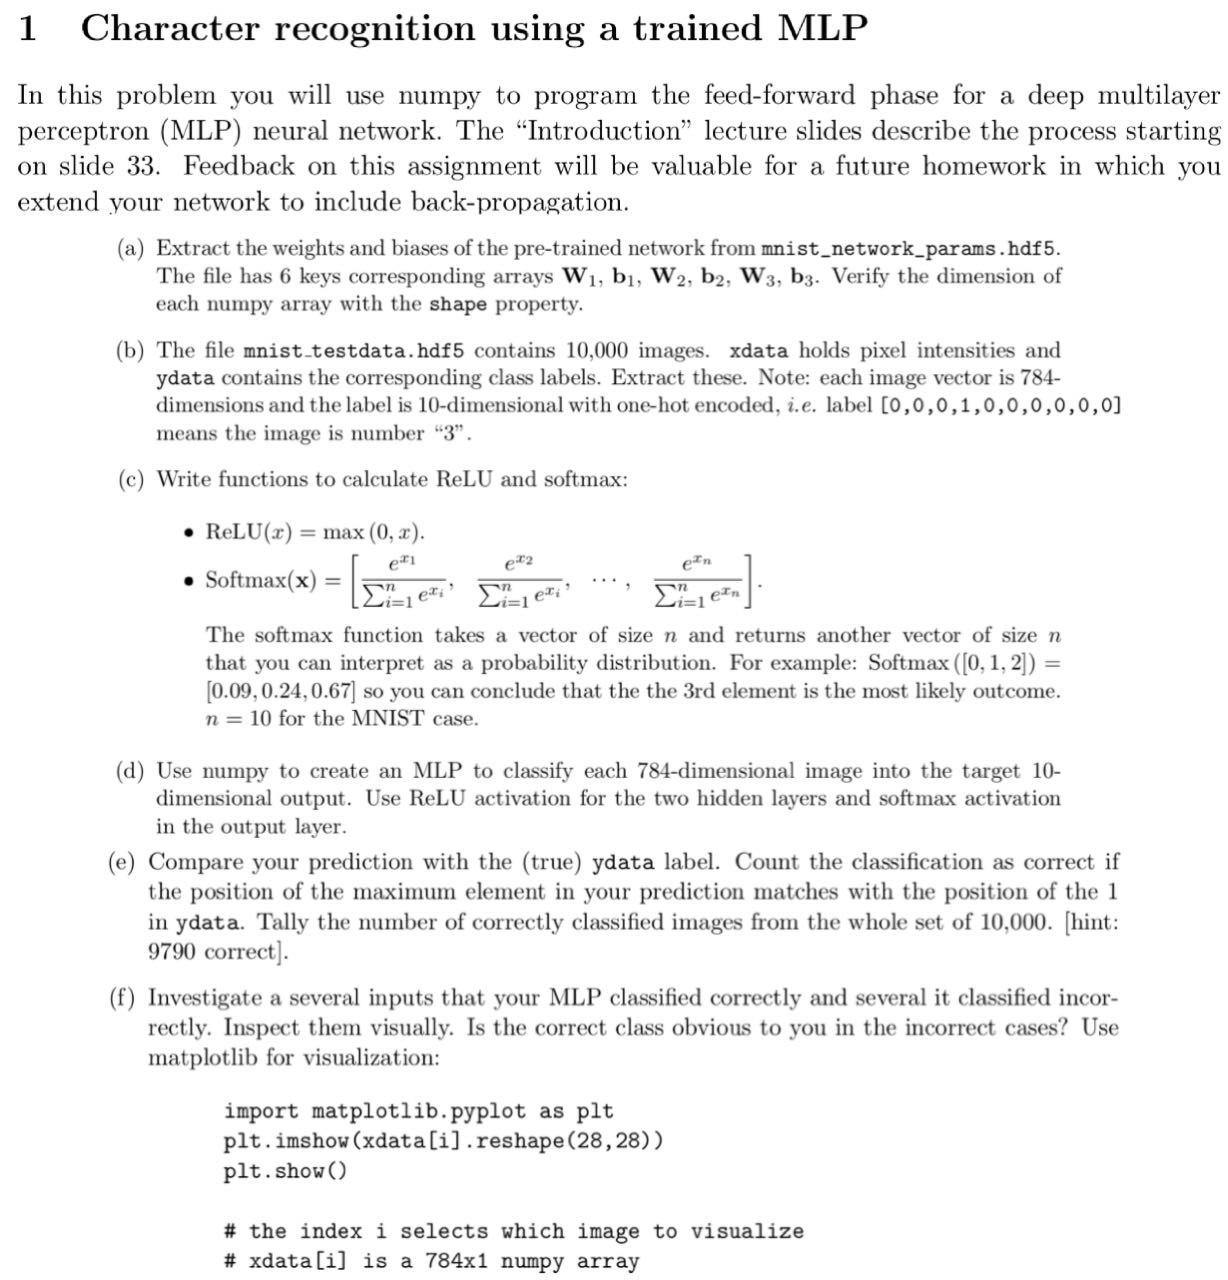

Correct classifications: 9790


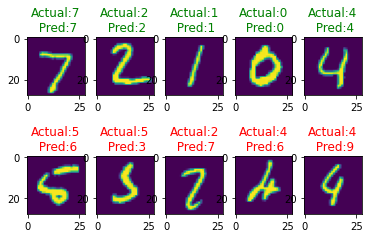

In [2]:
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt

class MLP():
    def __init__(self, weights_file, testdata_file):
        '''
        Subproblem (1)
        '''
        with h5py.File(weights_file,'r') as hf:
            self.params={
                'W1':hf['W1'][:],
                'b1':hf['b1'][:],
                'W2':hf['W2'][:],
                'b2':hf['b2'][:],
                'W3':hf['W3'][:],
                'b3':hf['b3'][:]
            }
        assert self.params['W1'].shape==(200,784), 'Error in W1 shape'
        assert self.params['b1'].shape==(200,), 'Error in b1 shape'
        assert self.params['W2'].shape==(100,200), 'Error in W2 shape'
        assert self.params['b2'].shape==(100,), 'Error in b2 shape'
        assert self.params['W3'].shape==(10,100), 'Error in W3 shape'
        assert self.params['b3'].shape==(10,), 'Error in b3 shape'

        '''
        Subproblem (2)
        '''
        with h5py.File(testdata_file,'r') as hf:
            self.x_test=hf['xdata'][:]
            self.y_test=hf['ydata'][:]

        assert self.x_test.shape==(10000,784), 'X data shape incorrect'
        assert self.y_test.shape==(10000,10), 'Y data shape incorrect'

    '''
    Subproblem (3)
    '''
    def relu(self, x):
        return np.clip(x,a_min=0,a_max=None)

    # Just for testing purposes not part of answer.
    def leaky_relu(self,x):
        return np.where(x>0, x, x*0.01)

    def softmax(self, x):
        return np.exp(x)/np.sum(np.exp(x))
    
    '''
    Subproblem (4)
    '''
    def forward(self, input):
        x=self.relu(np.matmul(self.params['W1'],input.T)+self.params['b1'])
        x=self.relu(np.matmul(self.params['W2'],x.T)+self.params['b2'])
        x=self.softmax(np.matmul((self.params['W3']),x.T)+self.params['b3'])
        return x

    def run_test(self):
        '''
        Subproblem(5)
        '''
        outputs=np.array([self.forward(data) for data in self.x_test])
        pred_class=np.argmax(outputs,axis=-1)
        gt_class=np.argmax(self.y_test,axis=-1)

        tally=np.where(pred_class==gt_class, 1, 0)
        print('Correct classifications:',np.count_nonzero(tally))

        correct_samples=np.where(tally==1)[0][:5]
        incorrect_samples=np.where(tally==0)[0][:5]

        '''
        Subproblem (6)
        '''
        fig=plt.figure()
        axes=[]
        for i in range(5*2):
            if i<5:
                axes.append(fig.add_subplot(2,5,i+1))
                subplot_title=('Actual:%d\n Pred:%d'%(gt_class[correct_samples[i]],pred_class[correct_samples[i]]))
                title_obj=axes[-1].title
                plt.setp(title_obj,color='g')
                axes[-1].set_title(subplot_title)
                plt.imshow(np.reshape(self.x_test[correct_samples[i]],(28,28)))
            else:
                axes.append(fig.add_subplot(2, 5, i+1))
                subplot_title = ('Actual:%d\n Pred:%d'%(gt_class[incorrect_samples[5-i]],pred_class[incorrect_samples[5-i]]))
                title_obj=axes[-1].title
                plt.setp(title_obj,color='r')
                axes[-1].set_title(subplot_title)
                plt.imshow(np.reshape(self.x_test[incorrect_samples[5-i]],(28,28)))
        plt.show()


weights_file='mnist_network_params.hdf5'
testdata_file='mnist_testdata.hdf5'
mlp=MLP(weights_file, testdata_file)
mlp.run_test()

In [ ]:
# PROBLEM 2 - HANDWRITTEN :/ 

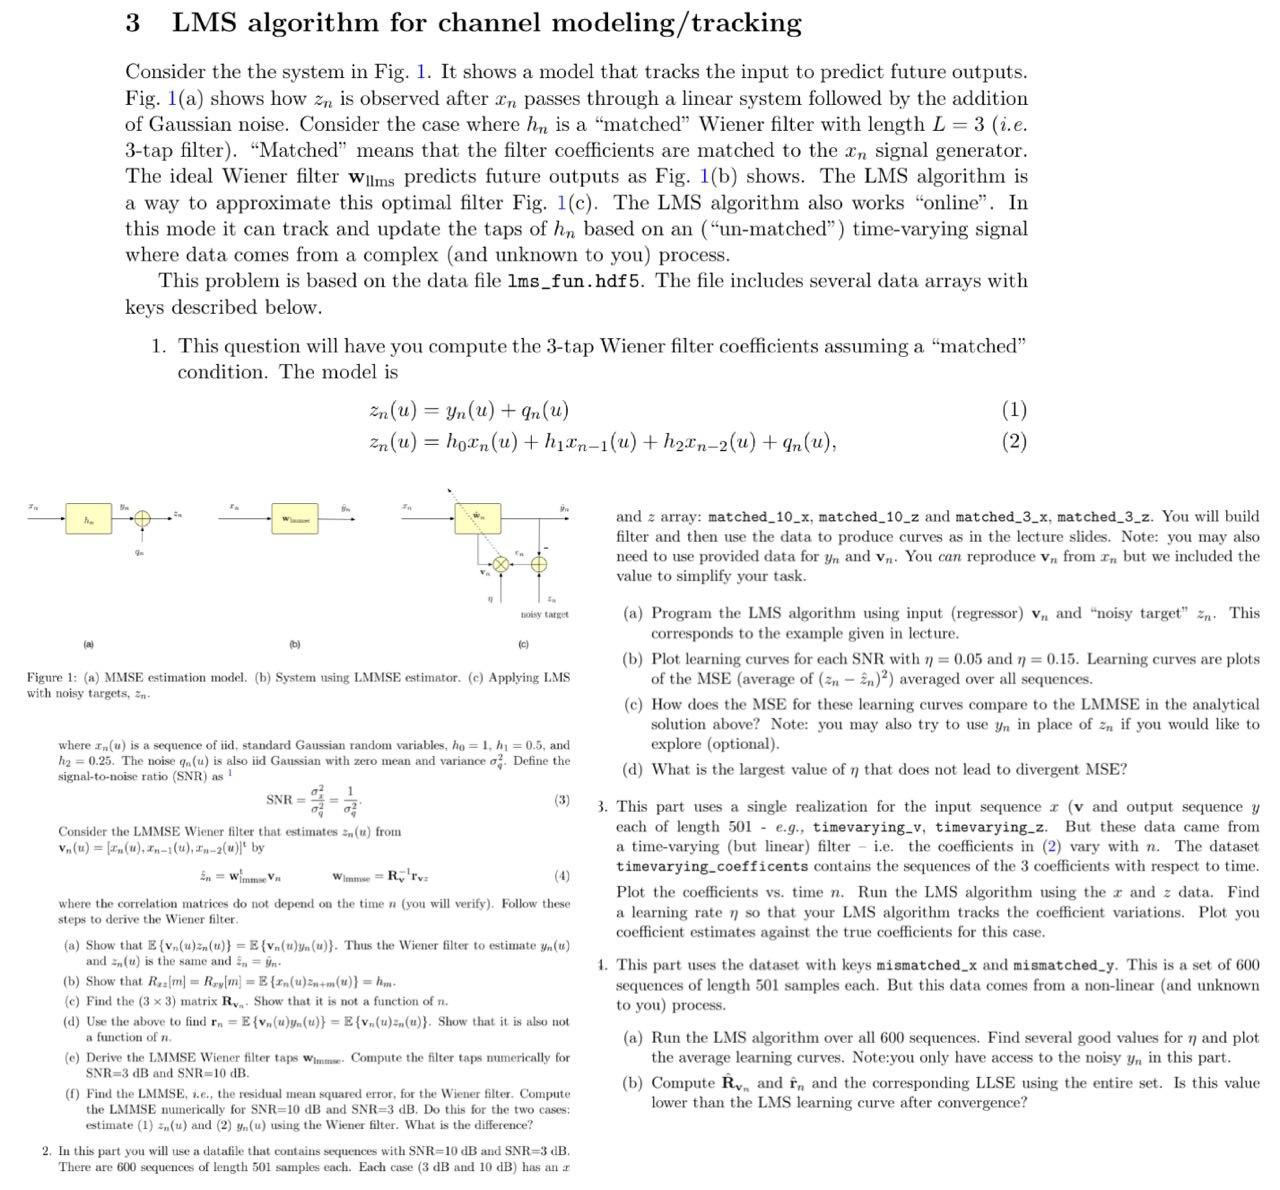

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

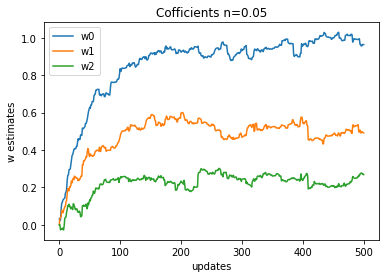

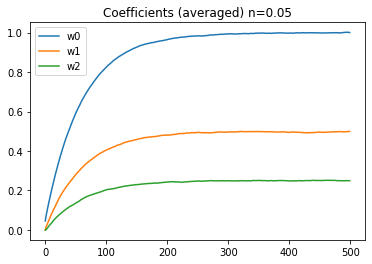

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

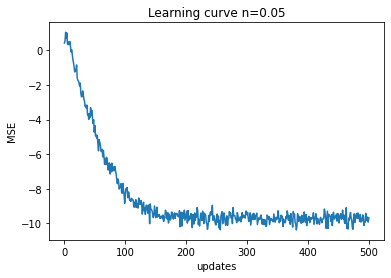

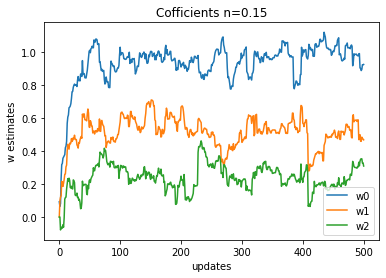

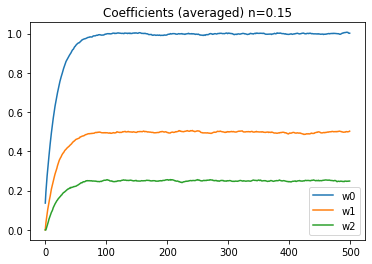

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

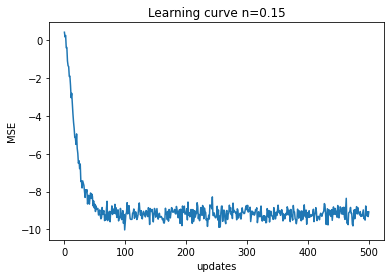

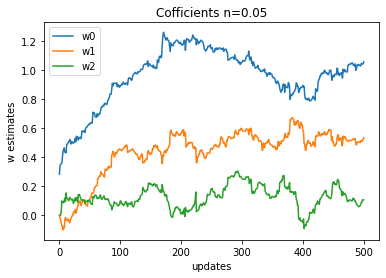

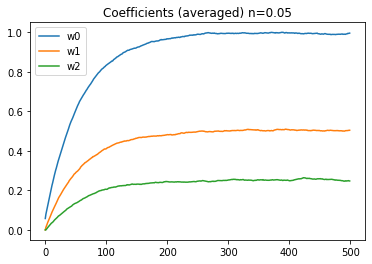

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

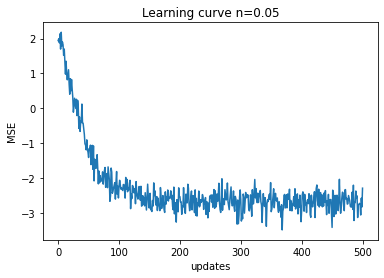

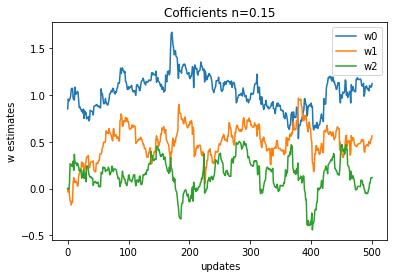

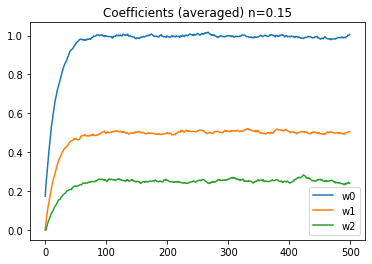

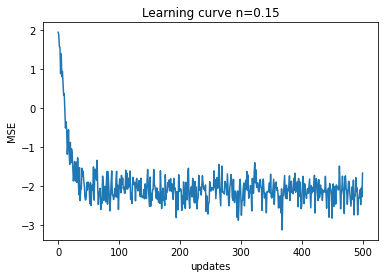

In [125]:
# -*- coding: utf-8 -*-
# From lecture code
import numpy as np
from scipy import signal
import pdb
import h5py
import tqdm
class LMS():
    def __init__(self,  L=10, step=0.1):
        self.L = L #number of delay elements
        self.step = step #step size 
        self.w = np.zeros(self.L) #initializing the weight vector 
        self.eps = 1e-3 #error tolerance to prevent divide by zero errors
        
    def __create_arrays__(self, x):
        v = np.zeros((len(x), self.L))
        v[0,0] = x[0]
        for i in range(1,len(x)):
            v[i,1:] = v[i-1, 0:-1]
            v[i,0] = x[i] #intializes the matrix v[n] here (each row consists of L elements) (here n means nth sample)
        return v
    def adapt(self, x, d, N=100, normalize=True):
        assert len(x)==len(d)
        v = self.__create_arrays__(x)
        N = len(d)
        w_1_=[]
        w_2_=[]
        w_3_=[]
        z_pred_=[]
        for i in range(N):
            prod = np.inner(self.w, v[i,:]) #predict y^[n]
            z_pred_.append(prod)
            if normalize:
                self.w += self.step * (d[i]-prod) * v[i] / (np.inner(v[i],v[i])+self.eps) #update LMS formula with normalization
            else:
                self.w += self.step * (d[i]-prod) * v[i] #LMS update equation
            w_1_.append(self.w[0])
            w_2_.append(self.w[1])
            w_3_.append(self.w[2])
            
        y = signal.lfilter(self.w, 1, x) #filter input noise signal x using the final weights obtained - will give the noise
        #w^{T}x
        e = d - y #subtract the reconstructed noise from input (signal + noise) to get the signal
        print('.',end='')
        return e, y, self.w, [w_1_,w_2_,w_3_], z_pred_
        
def subproblem2(eta=0.05, db=10):
  with h5py.File('lms_fun_v3.hdf5','r') as hf:
    data={
        'matched_10_v':hf['matched_10_v'][:],
        'matched_10_x':hf['matched_10_x'][:],
        'matched_10_y':hf['matched_10_y'][:],
        'matched_10_z':hf['matched_10_z'][:],
        'matched_3_v':hf['matched_3_v'][:],
        'matched_3_x':hf['matched_3_x'][:],
        'matched_3_y':hf['matched_3_y'][:],
        'matched_3_z':hf['matched_3_z'][:],
        'timevarying_x':hf['timevarying_x'][:],
        'timevarying_y':hf['timevarying_y'][:],
        'timevarying_v':hf['timevarying_v'][:],
        'timevarying_z':hf['timevarying_z'][:],
        'mismatched_v':hf['mismatched_v'][:],
        'mismatched_x':hf['mismatched_x'][:],
        'mismatched_y':hf['mismatched_y'][:],
    }
  
  
  e_ = []
  y_ = []
  w_ = []
  w_more_=[]
  z_hat_=[]
  
  for i in range(600):
    d = np.add(data['matched_'+str(db)+'_x'][i],data['matched_'+str(db)+'_z'][i])
    lms=LMS(L=3,step=eta)
    e,y,w,w_clc,z_pred_=lms.adapt(x=data['matched_'+str(db)+'_x'][i],d=data['matched_'+str(db)+'_z'][i],normalize=True)
    e_.append(e)
    y_.append(y)
    w_.append(w)
    z_hat_.append(z_pred_)
    w_more_.append(w_clc)

  err_list = []
  MSE = []
  w_1_=[]
  w_2_=[]
  w_3_=[]
  for j in range(500):
      w_1=[]
      w_2=[]
      w_3=[]
      for i in range(600):
          w_1.append(w_more_[i][0][j])
          w_2.append(w_more_[i][1][j])
          w_3.append(w_more_[i][2][j])
          # err = -(data['matched_10_z'][i][j] - np.dot(np.transpose(w_[i]),data['matched_10_v'][i][j]))**2
          # err_list.append(err)
      w_1_.append(np.average(np.array(w_1)))
      w_2_.append(np.average(np.array(w_2)))
      w_3_.append(np.average(np.array(w_3)))

  plt.figure()
  plt.plot(np.array(w_more_)[0,0], label='w0')
  plt.plot(np.array(w_more_)[0,1], label='w1')
  plt.plot(np.array(w_more_)[0,2], label='w2')
  plt.legend()
  plt.title('Cofficients n='+str(eta))
  plt.xlabel('updates')
  plt.ylabel('w estimates')
  plt.figure()
  plt.plot(w_1_, label='w0')
  plt.plot(w_2_, label='w1')
  plt.plot(w_3_, label='w2')
  plt.title('Coefficients (averaged) n='+str(eta))
  plt.legend()
  plt.show()

  plt.figure()
  plt.plot(10*np.log10(np.average(np.square(np.array(z_hat_)-data['matched_'+str(db)+'_z']),axis=0)))
  plt.xlabel('updates')
  plt.ylabel('MSE')
  plt.title('Learning curve n='+str(eta))
subproblem2(eta=0.05, db=10)
subproblem2(eta=0.15, db=10)
subproblem2(eta=0.05, db=3)
subproblem2(eta=0.15, db=3)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

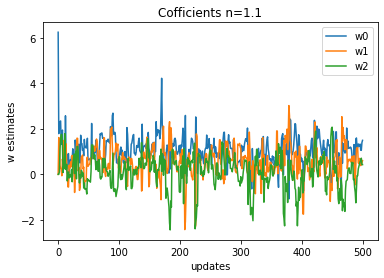

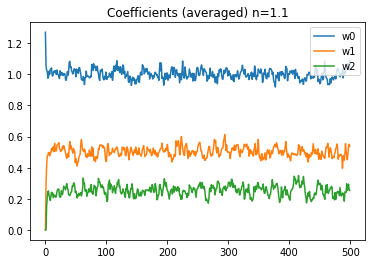

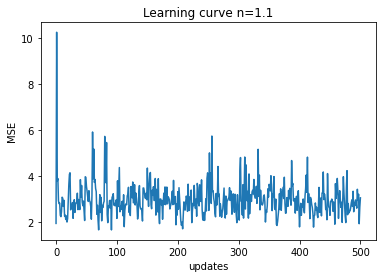

In [149]:
subproblem2(eta=1.1, db=3)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

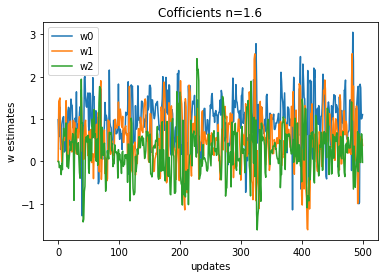

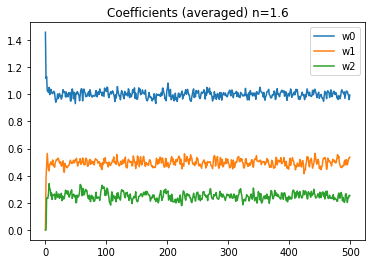

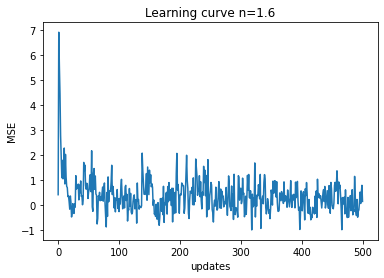

In [150]:
subproblem2(eta=1.6, db=10)


<KeysViewHDF5 ['matched_10_v', 'matched_10_x', 'matched_10_y', 'matched_10_z', 'matched_3_v', 'matched_3_x', 'matched_3_y', 'matched_3_z', 'mismatched_v', 'mismatched_x', 'mismatched_y', 'timevarying_coefficents', 'timevarying_v', 'timevarying_x', 'timevarying_y', 'timevarying_z']>
dict_keys(['matched_10_v', 'matched_10_x', 'matched_10_y', 'matched_10_z', 'matched_3_v', 'matched_3_x', 'matched_3_y', 'matched_3_z', 'timevarying_x', 'timevarying_y', 'timevarying_v', 'timevarying_z', 'timevarying_coefficients', 'mismatched_v', 'mismatched_x', 'mismatched_y'])
(501,)
(501, 3)
.[[ 1.         -0.5        -0.5       ]
 [ 0.99999126 -0.50361598 -0.49637528]
 [ 0.99996505 -0.50722316 -0.49274189]
 ...
 [-0.48909989 -0.51082147  0.99992136]
 [-0.49274189 -0.50722316  0.99996505]
 [-0.49637528 -0.50361598  0.99999126]]


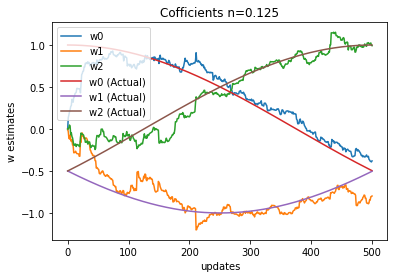

In [181]:
def subproblem3(eta=0.05, db=10):
  with h5py.File('lms_fun_v3.hdf5','r') as hf:
    print(hf.keys())
    data={
        'matched_10_v':hf['matched_10_v'][:],
        'matched_10_x':hf['matched_10_x'][:],
        'matched_10_y':hf['matched_10_y'][:],
        'matched_10_z':hf['matched_10_z'][:],
        'matched_3_v':hf['matched_3_v'][:],
        'matched_3_x':hf['matched_3_x'][:],
        'matched_3_y':hf['matched_3_y'][:],
        'matched_3_z':hf['matched_3_z'][:],
        'timevarying_x':hf['timevarying_x'][:],
        'timevarying_y':hf['timevarying_y'][:],
        'timevarying_v':hf['timevarying_v'][:],
        'timevarying_z':hf['timevarying_z'][:],
        'timevarying_coefficients':hf['timevarying_coefficents'][:],
        'mismatched_v':hf['mismatched_v'][:],
        'mismatched_x':hf['mismatched_x'][:],
        'mismatched_y':hf['mismatched_y'][:],
    }
  
  
  e_ = []
  y_ = []
  w_ = []
  w_more_=[]
  z_hat_=[]
  
  x= data['timevarying_x']
  z= data['timevarying_z']
  print(data.keys())
  print(z.shape)
  print(data['timevarying_coefficients'].shape)
  
  lms=LMS(L=3,step=eta)
  e,y,w,w_clc,z_pred_=lms.adapt(x=x,d=z,normalize=True)
  # e,y,w,w_clc,z_pred_=lms.adapt(x=data['matched_'+str(db)+'_x'][i],d=data['matched_'+str(db)+'_z'][i],normalize=True)

  
  # err_list = []
  # MSE = []
  # w_1_=[]
  # w_2_=[]
  # w_3_=[]
  # for j in range(500):
  #     w_1=[]
  #     w_2=[]
  #     w_3=[]
  #     for i in range(600):
  #         w_1.append(w_more_[i][0][j])
  #         w_2.append(w_more_[i][1][j])
  #         w_3.append(w_more_[i][2][j])
  #         # err = -(data['matched_10_z'][i][j] - np.dot(np.transpose(w_[i]),data['matched_10_v'][i][j]))**2
  #         # err_list.append(err)
  #     w_1_.append(np.average(np.array(w_1)))
  #     w_2_.append(np.average(np.array(w_2)))
  #     w_3_.append(np.average(np.array(w_3)))

  plt.figure()
  plt.plot(np.array(w_clc)[0], label='w0')
  plt.plot(np.array(w_clc)[1], label='w1')
  plt.plot(np.array(w_clc)[2], label='w2')
  plt.legend()
  plt.title('Cofficients n='+str(eta))
  plt.xlabel('updates')
  plt.ylabel('w estimates')
  
  plt.plot(np.array(data['timevarying_coefficients']).T[0], label='w0 (Actual)')
  plt.plot(np.array(data['timevarying_coefficients']).T[1], label='w1 (Actual)')
  plt.plot(np.array(data['timevarying_coefficients']).T[2], label='w2 (Actual)')
  plt.legend()
  plt.title('Cofficients n='+str(eta))
  plt.xlabel('updates')
  plt.ylabel('w estimates')
  print(data['timevarying_coefficients'])
subproblem3(eta=0.125)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................H= [0.96379991 0.27253493 0.32108051]
LLSE= 0.7999073070755824


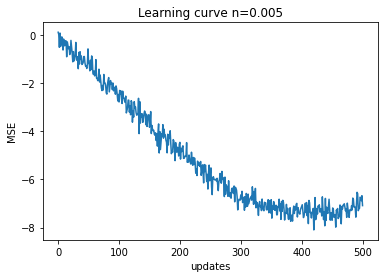

In [223]:
        
def subproblem4(eta=0.05, db=10):
  with h5py.File('lms_fun_v3.hdf5','r') as hf:
    data={
        'matched_10_v':hf['matched_10_v'][:],
        'matched_10_x':hf['matched_10_x'][:],
        'matched_10_y':hf['matched_10_y'][:],
        'matched_10_z':hf['matched_10_z'][:],
        'matched_3_v':hf['matched_3_v'][:],
        'matched_3_x':hf['matched_3_x'][:],
        'matched_3_y':hf['matched_3_y'][:],
        'matched_3_z':hf['matched_3_z'][:],
        'timevarying_x':hf['timevarying_x'][:],
        'timevarying_y':hf['timevarying_y'][:],
        'timevarying_v':hf['timevarying_v'][:],
        'timevarying_z':hf['timevarying_z'][:],
        'mismatched_v':hf['mismatched_v'][:],
        'mismatched_x':hf['mismatched_x'][:],
        'mismatched_y':hf['mismatched_y'][:],
    }
  
  
  e_ = []
  y_ = []
  w_ = []
  w_more_=[]
  z_hat_=[]
  
  x= data['mismatched_x']
  y_main= data['mismatched_y']
  noise = np.random.rand(501)
 
  for i in range(600):
    lms=LMS(L=3,step=eta)
    e,y,w,w_clc,z_pred_=lms.adapt(x=x[i],d=x[i]+y_main[i],normalize=True)
    e_.append(e)
    y_.append(y)
    w_.append(w)
    z_hat_.append(z_pred_)
    w_more_.append(w_clc)


  plt.figure()
  plt.plot(10*np.log10(np.average(np.square(np.array(z_hat_)-x),axis=0)))
  plt.xlabel('updates')
  plt.ylabel('MSE')
  plt.title('Learning curve n='+str(eta))
  print('H=',w_[-1]) # H= [0.96379991 0.27253493 0.32108051]
  # For LLSE = var_y 0 r_vy . w_llse where r_vy is again the filter weights
  # => LLSE = 0.903 (for close to 8)
  print('LLSE=',0.903-np.dot(w[-1].T,w[-1])) # LLSE= 0.02190730707558236
subproblem4(eta=0.005)

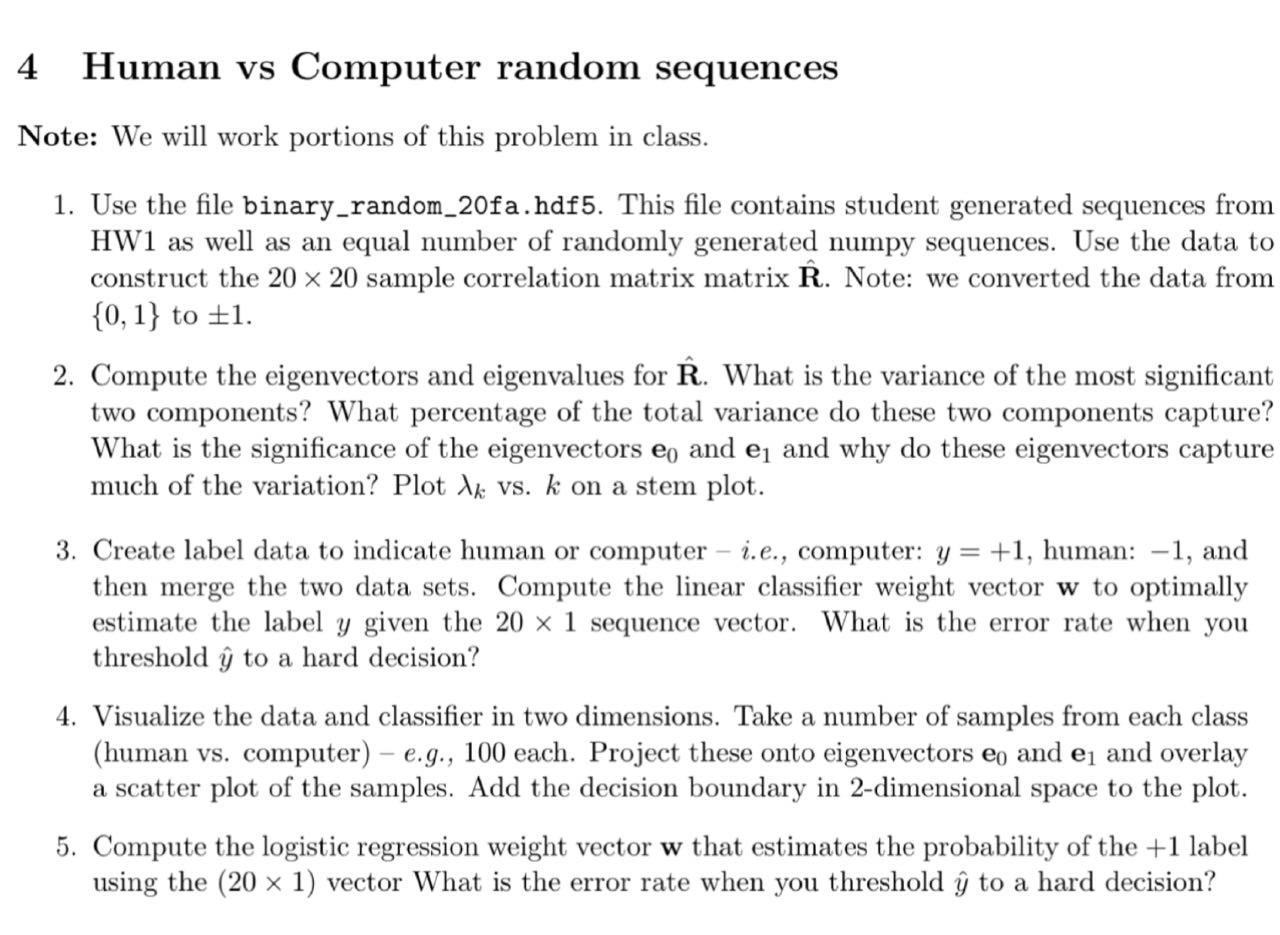

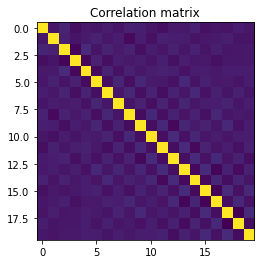

In [3]:
with h5py.File('binary_random_20fa.hdf5', 'r') as hf:
    human=hf['human'][:]
    machine=hf['machine'][:]

def subproblem1():
  x_data = np.vstack([human, machine])
  human_y=-np.ones(5100).T
  machine_y=np.ones(5100).T
  y_data=np.concatenate([human_y,machine_y])
  human_corr=np.corrcoef(human.T)
  machine_corr=np.corrcoef(machine.T)
  corr=np.corrcoef(x_data.T)
  plt.imshow(corr)
  plt.title('Correlation matrix')
  plt.show()
  return {
      'human_data':human,
      'machine_data':machine,
      'x_data':x_data,
      'y_data':y_data,
      'human':human_corr,
      'machine':machine_corr,
      'corr':corr
  }

data=subproblem1()

Top 2 components variance in humans: [0.17546912 0.08244742]
Top 2 components variance in machine: [0.06472918 0.06212669]
Top 2 components variance in total: [0.10404101 0.06683568]
Top 2 components contribute to 25.492596 percent of variance in humans
Top 2 components contribute to 12.641019 percent of variance in machine
Top 2 components contribute to 17.228555 percent of variance in total


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

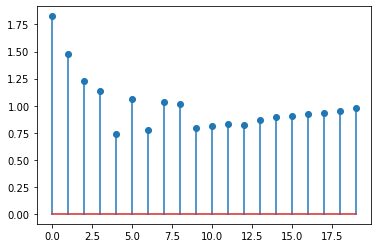

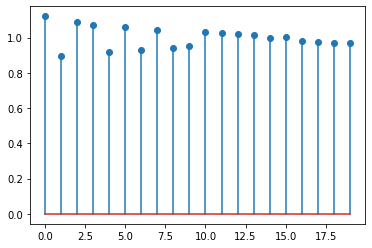

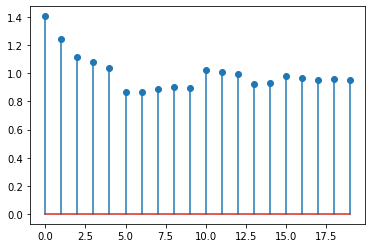

In [4]:
def subproblem2(data):
  from sklearn.decomposition import PCA
  human_R=data['human']
  machine_R=data['machine']
  corr_R=data['corr']
  pca_human=PCA(n_components=2)
  pca_machine=PCA(n_components=2)
  pca_total=PCA(n_components=2)
  
  pca_human.fit(human_R)
  pca_machine.fit(machine_R)
  pca_total.fit(corr_R)

  print('Top 2 components variance in humans:',pca_human.explained_variance_)
  print('Top 2 components variance in machine:',pca_machine.explained_variance_)
  print('Top 2 components variance in total:',pca_total.explained_variance_)
  
  print('Top 2 components contribute to %f percent of variance in humans'%sum(pca_human.explained_variance_ratio_*100))
  print('Top 2 components contribute to %f percent of variance in machine'%sum(pca_machine.explained_variance_ratio_*100))
  print('Top 2 components contribute to %f percent of variance in total'%sum(pca_total.explained_variance_ratio_*100))

  '''
  Significance of e0 and e1 is that they're the principal components which account for a 
  significant amount of variation. Also upon projecting to these two components the data
  becomes uncorrelated and dimension reduces to 2.
  '''
  plt.figure()
  plt.stem(np.linalg.eigvals(human_R))
  plt.figure()
  plt.stem(np.linalg.eigvals(machine_R))
  plt.figure()
  plt.stem(np.linalg.eigvals(corr_R))
  plt.show()
  data['pca_human']=pca_human
  data['pca_machine']=pca_machine
  data['pca_total']=pca_total
  return data
data=subproblem2(data)

In [40]:
def subproblem3(data):
  from sklearn.metrics import accuracy_score, zero_one_loss
  
  
  x_data=data['x_data']
  y_data=data['y_data']

  w = np.linalg.inv(x_data.T @ x_data) @ x_data.T @ y_data
  y_pred=np.sign(w@x_data.T)
  print('Misclassification rate (%): ',zero_one_loss(y_pred,y_data)*100)
  data['linear_classifier']=w
  return data

data=subproblem3(data)

Misclassification rate (%):  46.88235294117648


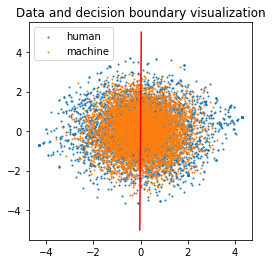

In [46]:
def subproblem4(data):
  human_data=data['human_data']
  machine_data=data['machine_data']
  proj_human_data=human_data@data['pca_total'].components_.T
  proj_machine_data=machine_data@data['pca_total'].components_.T
  proj_w=data['linear_classifier']@data['pca_total'].components_.T

  a=np.linspace(-5,5,1000)
  boundary=proj_w@np.vstack((a,a))
  
  fig = plt.figure(figsize=(4,4))
  plt.scatter(proj_human_data.T[0], proj_human_data.T[1], label = 'human', s=1)
  plt.scatter(proj_machine_data.T[0], proj_machine_data.T[1], label = 'machine', s=1)
  plt.plot(boundary,a,c='r')
  plt.title('Data and decision boundary visualization')
  plt.legend()
  plt.show()
  return data 
data=subproblem4(data)

In [39]:
def subproblem5(data):
  from sklearn.metrics import zero_one_loss
  from sklearn.linear_model import SGDClassifier, LogisticRegression
  from sklearn.preprocessing import StandardScaler
  from sklearn.pipeline import make_pipeline

  x_data=data['x_data']
  y_data=data['y_data']
  clf = make_pipeline(LogisticRegression(max_iter=500, tol=1e-3))
  clf.fit(x_data, y_data)
  pred = clf.predict(x_data)
  print('Misclassification rate(%):',zero_one_loss(pred,y_data)*100)
  return data
data=subproblem5(data)

Misclassification rate(%): 46.843137254901954
